### Breast cancer wisconsin dataset

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from yellowbrick.target import ClassBalance
from mlxtend.plotting import plot_confusion_matrix

In [2]:
df=pd.read_csv('breast_cancer.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

### Summary statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df['diagnosis']=df['diagnosis'].map({"M":0,"B":1})

### Co-relation matrix

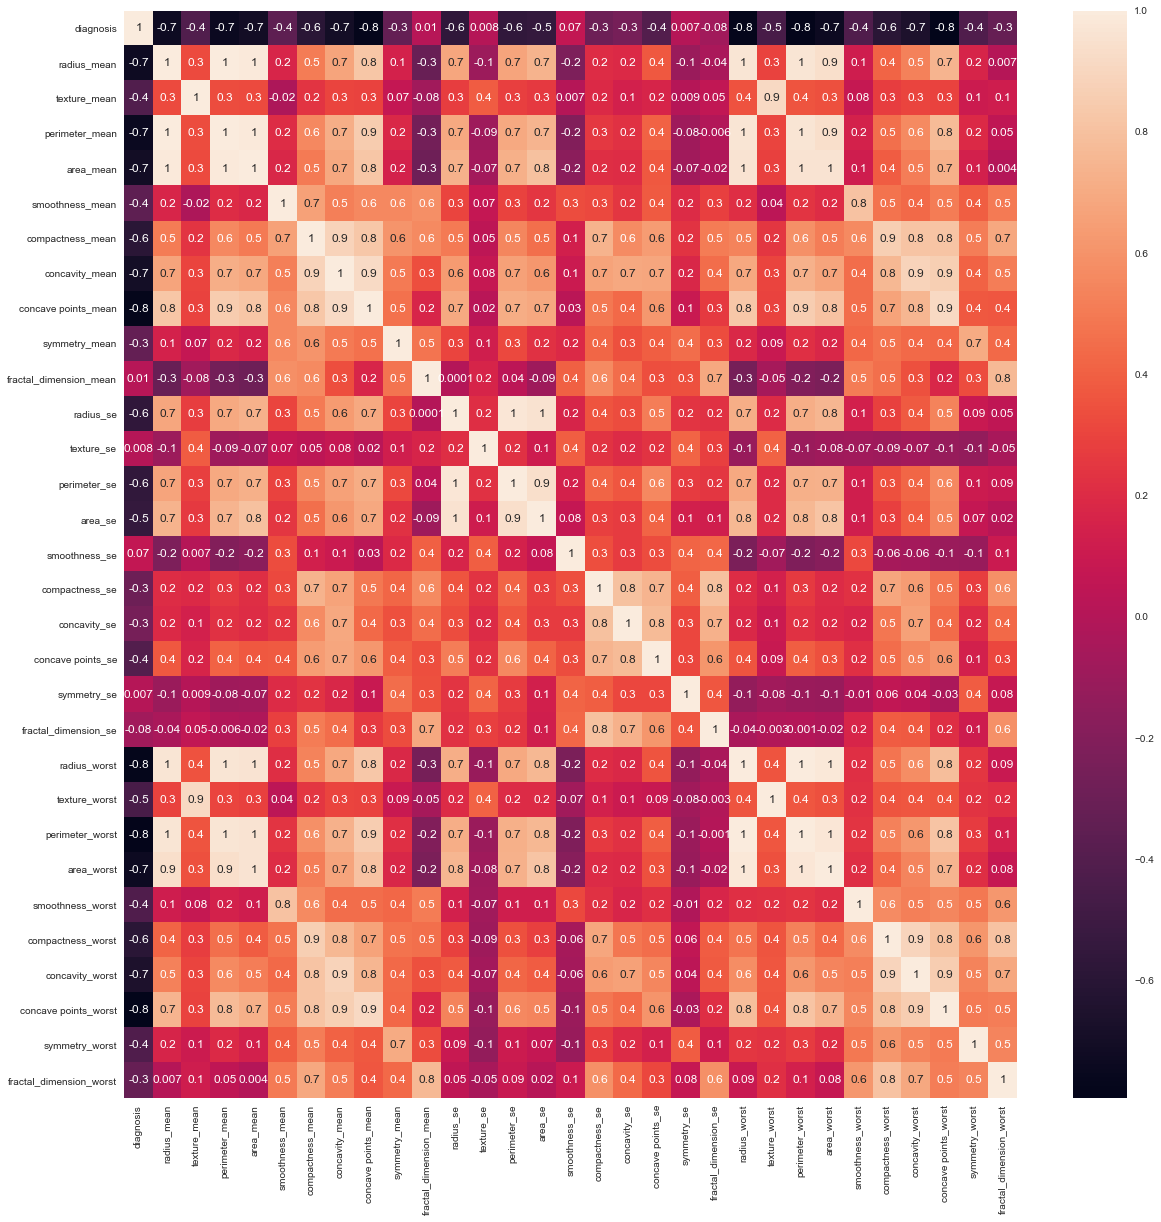

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.1g')

#### Features that are co-related the most with the target variables

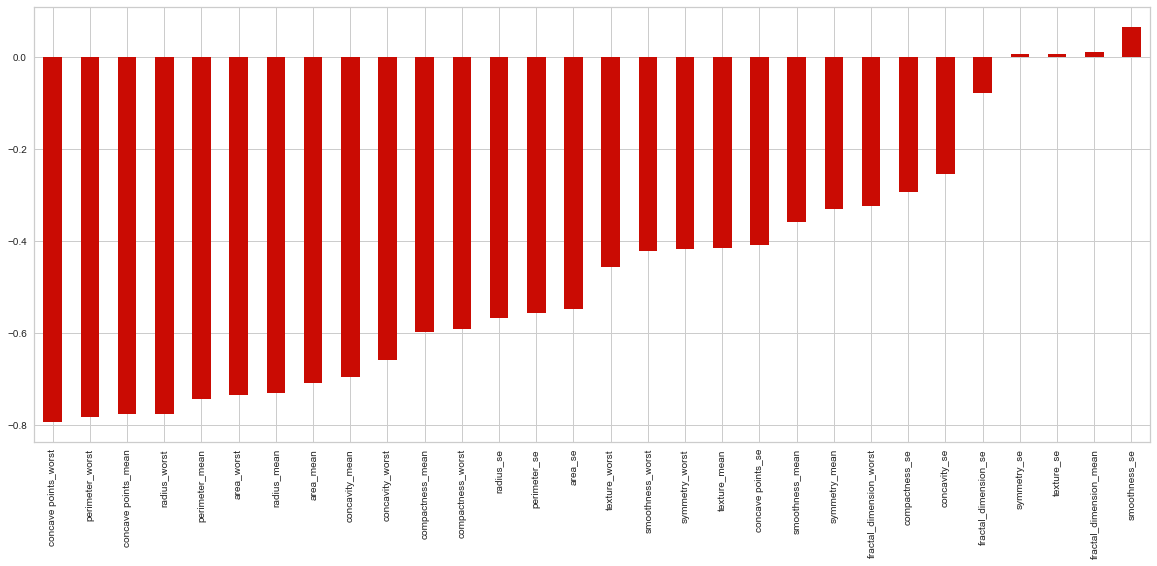

In [8]:
plt.figure(figsize=(20,8))
df.corr()['diagnosis'].sort_values()[:-1].plot(kind='bar',color='r')

In [9]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

### Train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### Scaling(Min-max)

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

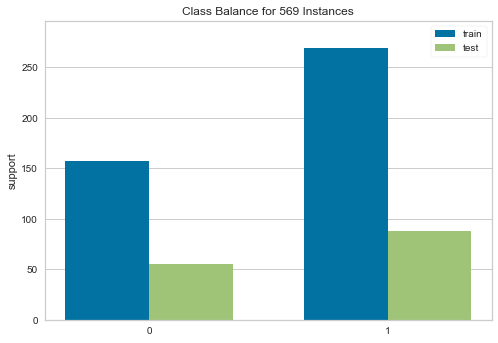

In [12]:
visualizer = ClassBalance(labels=[0, 1])
visualizer.fit(y_train, y_test)
visualizer.poof()

### Model-I

In [13]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [14]:
model.fit(x=X_train, y=y_train, epochs=800,validation_data=(X_test, y_test), verbose=1)

Epoch 1/800
14/14 [==============================] - 0s 16ms/step - loss: 0.6885 - val_loss: 0.6640
Epoch 2/800
14/14 [==============================] - 0s 6ms/step - loss: 0.6557 - val_loss: 0.6374
Epoch 3/800
14/14 [==============================] - 0s 6ms/step - loss: 0.6266 - val_loss: 0.6072
Epoch 4/800
14/14 [==============================] - 0s 5ms/step - loss: 0.5942 - val_loss: 0.5705
Epoch 5/800
14/14 [==============================] - 0s 5ms/step - loss: 0.5553 - val_loss: 0.5289
Epoch 6/800
14/14 [==============================] - 0s 5ms/step - loss: 0.5119 - val_loss: 0.4812
Epoch 7/800
14/14 [==============================] - 0s 5ms/step - loss: 0.4647 - val_loss: 0.4304
Epoch 8/800
14/14 [==============================] - 0s 6ms/step - loss: 0.4191 - val_loss: 0.3907
Epoch 9/800
14/14 [==============================] - 0s 6ms/step - loss: 0.3798 - val_loss: 0.3467
Epoch 10/800
14/14 [==============================] - 0s 6ms/step - loss: 0.3494 - val_loss: 0.3120
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.0602 - val_loss: 0.0943
Epoch 83/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0567 - val_loss: 0.0955
Epoch 84/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0564 - val_loss: 0.0928
Epoch 85/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0568 - val_loss: 0.0933
Epoch 86/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0554 - val_loss: 0.0923
Epoch 87/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0555 - val_loss: 0.0925
Epoch 88/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0592 - val_loss: 0.0934
Epoch 89/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0580 - val_loss: 0.0946
Epoch 90/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0543 - val_loss: 0.0928
Epoch 91/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0560 - val_loss: 0.0921
Epoch 92/800


14/14 [==============================] - 0s 6ms/step - loss: 0.0453 - val_loss: 0.1082
Epoch 164/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0450 - val_loss: 0.1104
Epoch 165/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0446 - val_loss: 0.1012
Epoch 166/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0447 - val_loss: 0.1052
Epoch 167/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0443 - val_loss: 0.1070
Epoch 168/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0440 - val_loss: 0.1108
Epoch 169/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0434 - val_loss: 0.1028
Epoch 170/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0451 - val_loss: 0.1159
Epoch 171/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0441 - val_loss: 0.1088
Epoch 172/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0430 - val_loss: 0.1122
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0389 - val_loss: 0.1254
Epoch 245/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0364 - val_loss: 0.1360
Epoch 246/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0363 - val_loss: 0.1263
Epoch 247/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0359 - val_loss: 0.1275
Epoch 248/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0367 - val_loss: 0.1222
Epoch 249/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0365 - val_loss: 0.1403
Epoch 250/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0388 - val_loss: 0.1270
Epoch 251/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.1258
Epoch 252/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0367 - val_loss: 0.1366
Epoch 253/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0360 - val_loss: 0.1270
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0283 - val_loss: 0.1474
Epoch 326/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0278 - val_loss: 0.1468
Epoch 327/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0280 - val_loss: 0.1546
Epoch 328/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0280 - val_loss: 0.1459
Epoch 329/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0281 - val_loss: 0.1535
Epoch 330/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0275 - val_loss: 0.1466
Epoch 331/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0277 - val_loss: 0.1451
Epoch 332/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0272 - val_loss: 0.1553
Epoch 333/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0267 - val_loss: 0.1503
Epoch 334/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0266 - val_loss: 0.1582
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0214 - val_loss: 0.1865
Epoch 407/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0226 - val_loss: 0.1688
Epoch 408/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0209 - val_loss: 0.1860
Epoch 409/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0215 - val_loss: 0.1656
Epoch 410/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0246 - val_loss: 0.1839
Epoch 411/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0205 - val_loss: 0.1669
Epoch 412/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0211 - val_loss: 0.1839
Epoch 413/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0231 - val_loss: 0.1693
Epoch 414/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0216 - val_loss: 0.1864
Epoch 415/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0213 - val_loss: 0.1592
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0170 - val_loss: 0.2041
Epoch 488/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0158 - val_loss: 0.2027
Epoch 489/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0180 - val_loss: 0.2223
Epoch 490/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0161 - val_loss: 0.2013
Epoch 491/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0187 - val_loss: 0.1861
Epoch 492/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0192 - val_loss: 0.2339
Epoch 493/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0152 - val_loss: 0.1867
Epoch 494/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0166 - val_loss: 0.1990
Epoch 495/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0166 - val_loss: 0.2216
Epoch 496/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0157 - val_loss: 0.2084
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0111 - val_loss: 0.2301
Epoch 569/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0117 - val_loss: 0.2338
Epoch 570/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0115 - val_loss: 0.2635
Epoch 571/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0116 - val_loss: 0.2356
Epoch 572/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0127 - val_loss: 0.2660
Epoch 573/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.2458
Epoch 574/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0116 - val_loss: 0.2106
Epoch 575/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0149 - val_loss: 0.3043
Epoch 576/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0158 - val_loss: 0.2007
Epoch 577/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0143 - val_loss: 0.3013
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0088 - val_loss: 0.2865
Epoch 650/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.2503
Epoch 651/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.3304
Epoch 652/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0101 - val_loss: 0.2253
Epoch 653/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.2926
Epoch 654/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.2720
Epoch 655/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.2777
Epoch 656/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.2812
Epoch 657/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.2648
Epoch 658/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.2710
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0067 - val_loss: 0.3592
Epoch 731/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.2952
Epoch 732/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.3505
Epoch 733/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.2948
Epoch 734/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.3618
Epoch 735/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 0.2789
Epoch 736/800
14/14 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.2902
Epoch 737/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.3291
Epoch 738/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.2750
Epoch 739/800
14/14 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.4145
Epoc

In [15]:
model_loss = pd.DataFrame(model.history.history)

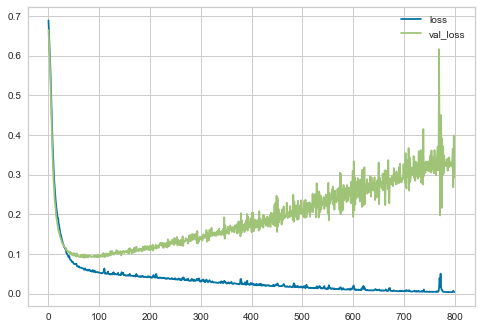

In [16]:
model_loss.plot()

### Model-II

In [17]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [18]:
early_stop = EarlyStopping(monitor='val_loss' ,verbose=1, patience=15)

In [19]:
model.fit(x=X_train, y=y_train, epochs=300,validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop])

Epoch 1/300
14/14 [==============================] - 0s 13ms/step - loss: 0.6774 - val_loss: 0.6513
Epoch 2/300
14/14 [==============================] - 0s 6ms/step - loss: 0.6266 - val_loss: 0.6035
Epoch 3/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5766 - val_loss: 0.5542
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5280 - val_loss: 0.5067
Epoch 5/300
14/14 [==============================] - 0s 6ms/step - loss: 0.4823 - val_loss: 0.4581
Epoch 6/300
14/14 [==============================] - 0s 6ms/step - loss: 0.4357 - val_loss: 0.4139
Epoch 7/300
14/14 [==============================] - 0s 6ms/step - loss: 0.3944 - val_loss: 0.3719
Epoch 8/300
14/14 [==============================] - 0s 6ms/step - loss: 0.3591 - val_loss: 0.3334
Epoch 9/300
14/14 [==============================] - 0s 6ms/step - loss: 0.3270 - val_loss: 0.3070
Epoch 10/300
14/14 [==============================] - 0s 6ms/step - loss: 0.3020 - val_loss: 0.2768
Epoch 11

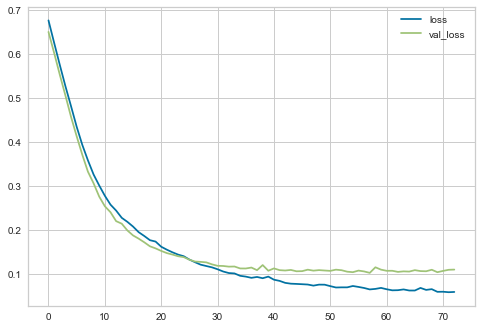

In [20]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Model-III

In [21]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
model.fit(x=X_train, y=y_train, epochs=300,validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop])

Epoch 1/300
14/14 [==============================] - 0s 14ms/step - loss: 0.6881 - val_loss: 0.6705
Epoch 2/300
14/14 [==============================] - 0s 7ms/step - loss: 0.6632 - val_loss: 0.6490
Epoch 3/300
14/14 [==============================] - 0s 7ms/step - loss: 0.6470 - val_loss: 0.6239
Epoch 4/300
14/14 [==============================] - 0s 7ms/step - loss: 0.6401 - val_loss: 0.6000
Epoch 5/300
14/14 [==============================] - 0s 7ms/step - loss: 0.6194 - val_loss: 0.5700
Epoch 6/300
14/14 [==============================] - 0s 7ms/step - loss: 0.5838 - val_loss: 0.5384
Epoch 7/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5866 - val_loss: 0.5139
Epoch 8/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5434 - val_loss: 0.4876
Epoch 9/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5444 - val_loss: 0.4608
Epoch 10/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5172 - val_loss: 0.4338
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.1028 - val_loss: 0.0811
Epoch 84/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1110 - val_loss: 0.0789
Epoch 85/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1086 - val_loss: 0.0909
Epoch 86/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1079 - val_loss: 0.0824
Epoch 87/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1078 - val_loss: 0.0809
Epoch 88/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1182 - val_loss: 0.0809
Epoch 89/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1084 - val_loss: 0.0887
Epoch 90/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1204 - val_loss: 0.0835
Epoch 91/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1033 - val_loss: 0.0842
Epoch 92/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1015 - val_loss: 0.0810
Epoch 93/300


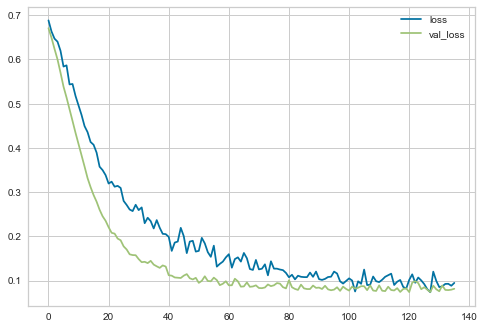

In [23]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Model Evaluation

In [24]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



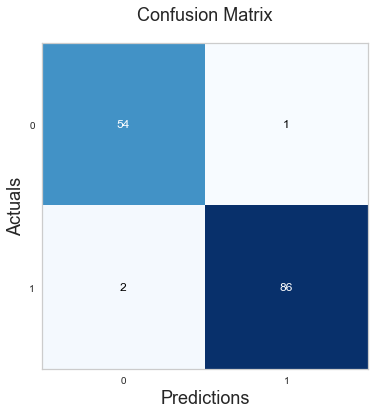

In [26]:
cm=confusion_matrix(y_test,predictions) 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()